# Практическая работа №1: Алгоритмы эффективного вычисления многочленов

Выполнил студент гр. 1304 Заика Тимофей. Вариант №35.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Определим понятия для оценки числа операций:

$\lambda(n)=\lceil log_2(n) \rceil$ - уменьшенная на 1 длина бинарной записи $n$

$\nu(n)$ - количество единиц в двоичной записи числа $n$ (вес Хемминга)

### Бинарный метод $SX$

Запишем $n$ в двоичной системе счисления, отбросим старший бит и заменим в этой записи каждую цифру “1” парой букв SX, а каждую цифру “0” – буквой S, после чего вычеркнем крайнюю левую пару букв SX. Результат, читаемый слева на право, превращается в правило вычисления $ х^n $, если букву “S” интерпретировать как операцию возведения в квадрат (S – square – квадрат), а букву “X ” – как операцию умножения на х.

Количество операций, требуемых для возведения числа $x$ в степень $n$, для данного метода равно $\lambda(n)+\nu(n)-1$

### Бинарный метод возведения в степень справа налево
Представим алгоритм вычисления $x^n$:
<ol>
    <li>Инициализируем $N = n; Y = 1; Z = x$</li>
    <li>Если $N$ чётно, то переходим к пункту 3, иначе к пункту 4</li>
    <li>Сначала $N = \lfloor N/2 \rfloor, далее   Z = Z * Z$, затем переходим к пункту 2</li>
    <li>Сначала $N = \lfloor N/2 \rfloor, далее   Y = Z * Y$</li>
    <li>Если $N = 0$, то $Y$ - результат работы алгоритма. Иначе снова $Z = Z * Z$ и переходим к пункту 2</li>
</ol>
Количество операций для данного метода равно $\lambda(n) + \nu(n)$

### Метод множителей
Рассмотрим алгоритм метода:
<ol>
    <li>Представим $n$ в виде разложения $n = p * q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$</li>
    <li>Если $n$ - простое, то вычислим $x^{n-1}$ и умножим его на x</li>
    <li>При $n = 1$ - получим $x^n$ безо всяких вычислений</li>
</ol>
Следуя по шагам данного алгоритма можно раскладывать $p$ на любом шаге, и в итоге вычислить $x^n$ при любых натуральных $n$

### Дерево степеней
Рассмотрим алгоритм построение дерева степеней до $k$-го уровня:
<ol>
    <li>На нулевом уровне в дереве только один узел - $1$ - корень дерева</li>
    <li>Далее строим $k+1$-й уровень: берём каждый узел $i$ на $k$-м уровне слева направо и присоединяем узлы $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$</li>
    <li>Если какой-то узел уде появлался раньше в дереве, то он устраняется, т.е. новый повторный узел не добавляется</li>
</ol>


## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Бинарный метод "SX"

In [3]:
def sx_bin_method(n):
    seq = "" # Храним последовательность S и X
    bin_n = bin(n)[3:] # Бинарная запись n без старшего бита
    # Создаем последовательность S и X из бинарной записи
    for i in bin_n:
        if i == '1':
            seq += "SX"
        else:
            seq += "S"
    print("Последовательность S и X: ", seq)

    # Применяем бинарный метод SX и 
    # последовательно выводим значения x^i после каждой итерации
    degrees = []
    degree = 1
    for el in seq:
        if el == "S":
            degree *= 2
        elif el == "X":
            degree += 1
        degrees.append(degree)
        print(x^degree, end=' ')

    print("\nЧисло операций: ", len(degrees))

Приведем примеры работы при некоторых n

In [4]:
# Пример работы при n=23
sx_bin_method(23)

Последовательность S и X:  SSXSXSX
x^2 x^4 x^5 x^10 x^11 x^22 x^23 
Число операций:  7


In [5]:
# Пример работы при n=33
sx_bin_method(33)

Последовательность S и X:  SSSSSX
x^2 x^4 x^8 x^16 x^32 x^33 
Число операций:  6


In [6]:
# Пример работы при n=49
sx_bin_method(49)

Последовательность S и X:  SXSSSSX
x^2 x^3 x^6 x^12 x^24 x^48 x^49 
Число операций:  7


Проверим оценку числа операций:  
$n = 23 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 4; \nu(n) = 4; \lambda(n) + \nu(n) - 1 = 7 \Rightarrow$ Верно<br>
$n = 33 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) - 1 = 6 \Rightarrow$ Верно<br>
$n = 49 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 7 \Rightarrow$ Верно<br>
Таким образом, формула для вычисления количества операций для представленных $n$ корректна.

<b>Выводы:</b>  
Реализован бинарный метод $SX$, проверена правильность его работы, подтвержеденная оценкой числа операций. Данный метод прост в реализации и понимании, однако при этом позволяет быстро вычислять мономы. При помощи оценки операций можно легко узнать их количество при использовании данного метода.

### 2. Бинарный метод возведения в степень справа налево

In [13]:
# Функция реализует алгоритм из теоретического положения
def from_right_to_left_method(n):
    iter_counter = 0 #
    N = n
    Y = 1
    Z = var('x')
    while True:
        if N % 2 == 0:
            N = floor(N/2)
            Z = Z * Z
        else:
            N = floor(N/2)
            Y = Z * Y
            if N == 0:
                iter_counter += 1
                break
            else:
                Z = Z * Z
        iter_counter += 1
        print(f"i: {iter_counter} N: {N} Y: {Y} Z: {Z}\n") # Вывод промежуточного результата
    print(f"i: {iter_counter} N: {N} Y: {Y} Z: {Z}\n")
    return Y

Приведем примеры работы при некоторых n. Для каждого из них представим результат в виде таблицы.

In [14]:
# Пример работы при n=23
from_right_to_left_method(23)

i: 1 N: 11 Y: x Z: x^2

i: 2 N: 5 Y: x^3 Z: x^4

i: 3 N: 2 Y: x^7 Z: x^8

i: 4 N: 1 Y: x^7 Z: x^16

i: 5 N: 0 Y: x^23 Z: x^16



x^23

Таблица для $n$=23

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     23     |      1     |      $x$     |
|      1     |     11     |      $x$     |    $x^2$   |
|      2     |      5     |      $x^3$     |     $x^4$    |
|      3     |      2     |      $x^7$     |     $x^8$    |
|      4     |      1     |      $x^7$     |    $x^{16}$    |
|      5     |      0     |      $x^{23}$     |    $x^{16}$    |

In [15]:
# Пример работы при n=33
from_right_to_left_method(33)

i: 1 N: 16 Y: x Z: x^2

i: 2 N: 8 Y: x Z: x^4

i: 3 N: 4 Y: x Z: x^8

i: 4 N: 2 Y: x Z: x^16

i: 5 N: 1 Y: x Z: x^32

i: 6 N: 0 Y: x^33 Z: x^32



x^33

Таблица для $n$=33

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     33     |      1     |      $x$     |
|      1     |     16     |      $x$     |    $x^2$   |
|      2     |      8     |      $x$     |     $x^4$    |
|      3     |      4     |      $x$     |     $x^8$    |
|      4     |      2     |      $x$     |    $x^{16}$    |
|      5     |      1     |      $x$     |    $x^{16}$    |
|      6     |      0     |      $x^{33}$     |    $x^{32}$    |

In [16]:
# Пример работы при n=49
from_right_to_left_method(43)

i: 1 N: 21 Y: x Z: x^2

i: 2 N: 10 Y: x^3 Z: x^4

i: 3 N: 5 Y: x^3 Z: x^8

i: 4 N: 2 Y: x^11 Z: x^16

i: 5 N: 1 Y: x^11 Z: x^32

i: 6 N: 0 Y: x^43 Z: x^32



x^43

Таблица для $n$=49

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     49     |      1     |      $x$     |
|      1     |     21     |      $x$     |    $x^2$   |
|      2     |      10     |      $x^3$     |     $x^4$    |
|      3     |      5     |      $x^3$     |     $x^8$    |
|      4     |      2     |      $x^{11}$     |    $x^{16}$    |
|      5     |      1     |      $x^{11}$     |    $x^{32}$    |
|      6     |      0     |      $x^{43}$     |    $x^{32}$    |

Проверим оценку числа операций:  
$n = 23 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 4; \nu(n) = 4; \lambda(n) + \nu(n) = 8 \Rightarrow$ Верно<br>
$n = 33 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) = 7 \Rightarrow$ Верно<br>
$n = 49 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 3; \lambda(n) + \nu(n) = 8 \Rightarrow$ Верно<br>
Таким образом, формула для вычисления количества операций для представленных $n$ корректна.

<b>Выводы:</b>  
Реализован бинарный метод возведения справа налево, проверена правильность его работы, подтвержеденная оценкой числа операций. Данный метод менее прост в реализации и понимании, чем бинарынй метод $SX$, и при этом требуется на одну операцию больше для вычисления мономов. При помощи оценки операций можно легко узнать их количество при использовании данного метода. В общем случае после завершения алгоритма значение $Z$ равно $x^{2^{k-2}}$, где $k$ - количество итераций метода.

### 3. Сравнение бинарного метода $SX$  и метода возведение справа налево

Опираясь на оценку числа операций, можно сказать, что количество операций в методе $SX$ меньше, чем в методе возведения справа налево. В методе $SX$ число операций равно $\lambda(n)+\nu(n)-1$, а в методе возведения справа налево равно $\lambda(n)+\nu(n)$ или же можно оценить как $\lfloor \log_{2}(n) \rfloor + 2$.

<b>Выводы:</b>  
Исходя из вышесказанного можно заключить, что бинарный метод $SX$ выгоднее метода возведения справа налево.

### 4. Метод множителей

Выполним метод множителей вручную для некоторых n по алгоритму из теоретического положения.

При $n$=23

$x^{23} = x*x^{22}$<br>
$x^{22} = (x^{2})^{11}$<br>
$(x^{2})^{11} = x*(x^{2})^{10}$<br>
$(x^{2})^{10} = ((x^{2})^{2})^5$<br>
Получим нужные значения.<br>
$x^2 \rightarrow x, x^2$ (1 операция)<br>
$(x^2)^2 \rightarrow x^2, (x^2)^2$ (+ 1 операция)<br>
$(x^{2})^{10} = (((x^2))^2)^5 \rightarrow ((x^2))^2, (((x^2))^2)^2, (((x^2))^2)^4, (((x^3))^2)^5$ (+ 3 операции)<br>
$x^{22} = (x^{2})^{11} \rightarrow (x^{2})^{10}, (x^{2})^{11}$ (+ 1 операция)<br>
$x^{23} = x*(x^{2})^{11}$ (+ 1 операция)<br>
Итого 7 операций.

При $n$=33

$x^{33} = (x^{3})^{11}$<br>
$(x^{3})^{11} = x^{3} * (x^{3})^{10}$<br>
$(x^{3})^{10} = ((x^{3})^{2})^{5}$<br>
Получим данные значения.<br>
$x^3 \rightarrow x, x^2, x^3$ (2 операции)<br>
$(x^3)^2 \rightarrow x^3, (x^3)^2$ (+ 1 операция)<br>
$(x^{3})^{10} = (((x^3))^2)^5 \rightarrow ((x^3))^2, (((x^3))^2)^2, (((x^3))^2)^4, (((x^3))^2)^5$ (+ 3 операции)<br>
$x^{33} = (x^{3})^{11} \rightarrow (x^{3})^{10}, (x^{3})^{11}$ (+1 операция)<br>
Итого 7 операций. Здесь видно, что метод множителей хуже метода $SX$, т.к. там для $n=33$ было 6 операций.

При $n$=49

$x^{49} = (x^{7})^{7}$<br>
$(x^{7})^{7} = x * (x^{7})^{6}$<br>
$(x^{7})^{6} = ((x^{7})^{2})^{3}$<br>
Получим данные значения.<br>
$x^7 \rightarrow x, x^2, x^3, x^4, x^7$ (4 операции)<br>
$(x^7)^2 \rightarrow x^7, (x^7)^2$ (+ 1 операция)<br>
$((x^{7})^{2})^3 = (x^7)^6 \rightarrow ((x^7)^2), ((x^7)^2)^2, ((x^7)^2)^3$ (+ 2 операции)<br>
$x^49 = (x^7)^7 \rightarrow (x^7)^6, (x^7)^7$ (+ 1 операция)<br>
Итого 8 операций. Здесь видно, что метод множителей хуже метода $SX$, т.к. там для $n=49$ было 7 операций.

Рассмотрим $n$=15 , при котором метод множителей быстрее бинарного метода $SX$.

$x^{15} = (x^3)^5$<br>
$(x^3)^5 = x^3 * (x^3)^4$<br>
Получим данные значения.<br>
$x^3 \rightarrow x, x^2, x^3$ (2 операции)<br>
$(x^3)^4 \rightarrow x^3, (x^3)^2, (x^3)^4$ (+ 2 операции)<br>
$(x^3)^5 = x^3 * (x^3)^4 \rightarrow (x^3)^4, (x^3)^5$ (+ 1 операция)<br>

In [49]:
sx_bin_method(15)

Последовательность S и X:  SXSXSX
x^2 x^3 x^6 x^7 x^14 x^15 
Число операций:  6


В итоге 5 операций против 6 у бинарного метода $SX$

<b>Выводы:</b>  
Рассмотрен метод множителей для нескольких n. Его плюсы в простоте идеи и возможности прогнать алгоритм вручную. Также он бывает быстрее других методов. Его минусы в сложности программной реализации и в том, что зачастую требует больше операций, чем другие методы.

### 5. Построение дерева степеней

Представим алгоритм построения "дерева степеней" (<i>create_degrees_tree</i>) до заданного уровня $k$. Дерево хранится в структуре, основанной на словаре вида {узел: спискок родителей узла}. Выполняаем перебор уровней от 0 до $k$, и если нового возможного элемента нет в дереве, то вставляем его на следующий уровень. Вспомогательная функция <i>get_path_to_node</i> строит цепочку от вершины до рассматриваемого узла.

In [28]:
def get_path_to_node(tree, node):
    path = [node]
    while node != 1:
        node = tree[node][0]
        path.append(node)
    return path[::-1]

def create_degrees_tree(k):
    tree = {1:[]}
    cur_lvl_nodes = [1]
    for lvl in range(k):
        next_lvl_nodes = []
        for parent in cur_lvl_nodes:
            for node_in_path in get_path_to_node(tree, parent):
                probably_child = parent + node_in_path
                if probably_child not in tree:
                    tree[probably_child] = [parent]
                    next_lvl_nodes.append(probably_child)
        cur_lvl_nodes = next_lvl_nodes
    return tree

Функция <i>get_edges_to_node</i> создает список кортежей-ребер от вершины до заданного узла

In [36]:
def get_edges_to_node(tree, node):
    path = get_path_to_node(tree, node)
    edges = []
    for i in range(len(path)-1):
        edges.append((path[i], path[i+1]))
    return edges

Функция <i>print_degrees_tree</i> выводит дерево в виде графа и выделяет на рисунке ребра пути до заданного $n$

In [37]:
def print_degrees_tree(tree, node=None):
    printable_graph = Graph(tree)
    if node not in tree:
        node = 1
    graph_plot = printable_graph.plot(layout = 'tree', tree_root = 1, vertex_color = 'white', by_component = True,
                         edge_colors={(0, 1, 0): get_edges_to_node(tree, node)})
    graph_plot.show()

Представим работу метода на некоторых $n$

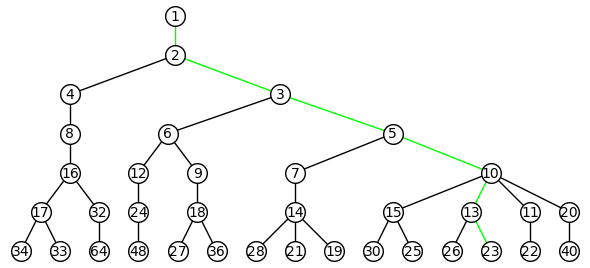

In [38]:
# При n=23 до 6 уровня
print_degrees_tree(create_degrees_tree(6), 23)

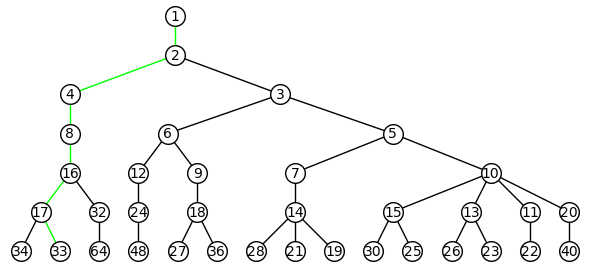

In [39]:
# При n=33 до 6 уровня
print_degrees_tree(create_degrees_tree(6), 33)

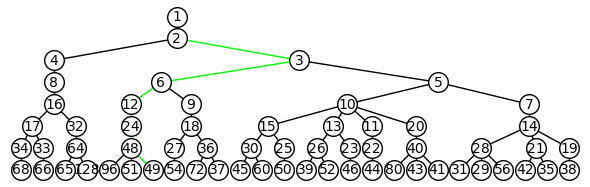

In [40]:
# При n=49 до 7 уровня
print_degrees_tree(create_degrees_tree(7), 49)

Таким образом, например для $n$=49

In [41]:
get_path_to_node(create_degrees_tree(7), 49)

[1, 2, 3, 6, 12, 24, 48, 49]

Получаем цепочку $x$, $x^2$, $x^3$, $x^6$, $x^{12}$, $x^{24}$, $x^{48}$, $x^{49}$

Теперь сравним данный метод с бинарным методом $SX$. Для этого создадим функцию <i>get_amount_of_operations_of_bin_SX_method</i>, которая возвращает количество операций в бинарном методе $SX$, а также функцию <i>get_amount_of_operations_of_degrees_tree</i>, которая возвращает количество операций в "дереве степеней"

In [46]:
def get_amount_of_operations_of_bin_SX_method(n):
    return floor(log(n, 2)) + bin(n)[2:].count('1') - 1

def get_amount_of_operations_of_degrees_tree(n):
    ops_counter = 0
    founded_flag = False
    tree = {1:[]}
    cur_lvl_nodes = [1]
    while not founded_flag:
        ops_counter += 1
        next_lvl_nodes = []
        for parent in cur_lvl_nodes:
            for node_in_path in get_path_to_node(tree, parent):
                probably_child = parent + node_in_path
                if probably_child == n:
                    founded_flag = True
                if probably_child not in tree:
                    tree[probably_child] = [parent]
                    next_lvl_nodes.append(probably_child)
        cur_lvl_nodes = next_lvl_nodes
    return ops_counter

Проверим, что дерево степеней не хуже бинарного метода $SX$ в интервале $2 \leq n \leq  3000$

In [48]:
degrees_tree_is_better = True

for n in range(2, 3000):
    if get_amount_of_operations_of_bin_SX_method(n) < \
       get_amount_of_operations_of_degrees_tree(n):
        degrees_tree_is_better = False
        break
        
if degrees_tree_is_better:
    print("Предположение верно")
else:
    print("Суждение ошибочно")

Предположение верно


<b>Выводы</b>  
Реализован алгоритм "дерева степеней", дерево отображено средствами *SageMath* до заданного уровня $k$, выделен цветом путь от вершины дерева до заданного числа $n$. При сравнении определено, что метод "дерева степеней" лучше бинарного метода $SX$, а значит и лучше метода возведения справа налево. Также дерево степеней лучше метода множителей относительно использованного количества умножений.

## Выводы



Сформированы знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привит навык использования систем компьютерной математики для реализации алгоритмов. Реализованы алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, проведен анализ алгоритмов. Полученные результаты содержательно проинтерпретированы.